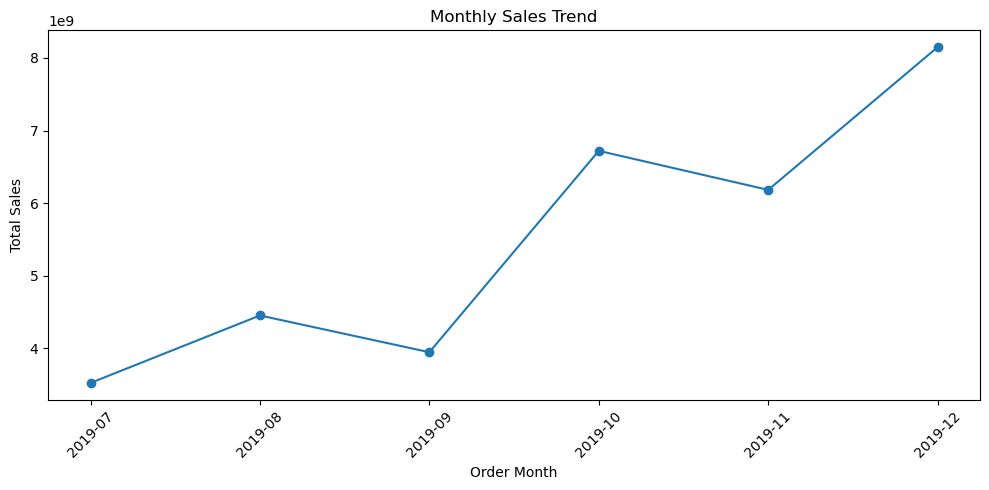

In [1]:
# Retail Sales Analysis Project
# This script analyzes retail sales data using Python's Pandas and Matplotlib libraries.
# It includes various visualizations to understand sales trends, customer distribution, and product performance.
# The dataset is assumed to be in CSV format and contains columns such as order_date, quantity, item_price, province, city, brand, and customer_id.
# The analysis includes monthly sales trends, sales by province, order volume, average item prices, and more.
# The script is structured to provide insights into the retail business, helping to identify growth opportunities and areas for improvement.

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# pd.read_csv() is used to load CSV file into a DataFrame
# 'C:\\FAWAZUL\\Bootcamp\\DQLab\\dataset_matplotlib1.csv' is the full path to the dataset
# Make sure the file path is correctly typed and that the file is accessible
retail = pd.read_csv("C:\\FAWAZUL\\Bootcamp\\DQLab\\matplotlib_exercise\\dataset_matplotlib1.csv")

# Convert order_date column to datetime format
# This enables us to extract month and year from the dates for time-based analysis
retail['order_date'] = pd.to_datetime(retail['order_date'])

# ===============================
# CASE 1: Monthly Sales Trend Analysis
# ===============================
# Objective: Show how total sales trend varies per month
# This chart shows the fluctuation of total sales across months, helping identify sales trends over time.

retail['sales'] = retail['quantity'] * retail['item_price']
retail['order_month'] = retail['order_date'].dt.to_period('M')
monthly_sales = retail.groupby('order_month')['sales'].sum()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


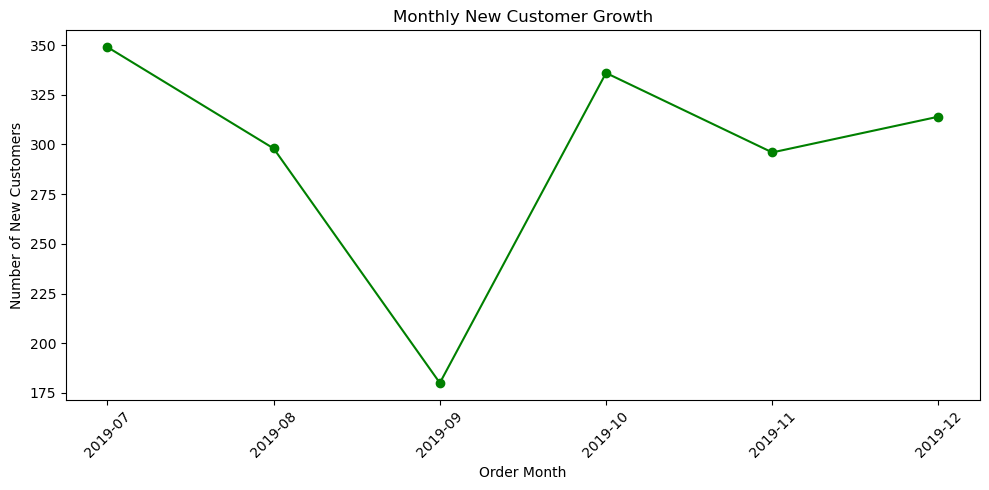

In [2]:
# ===============================
# CASE 2: Monthly Customer Growth
# ===============================
# Objective: Show number of new customers acquired each month
# This chart shows how many new customers started purchasing each month, giving insight into customer acquisition trends.

first_order = retail.sort_values('order_date').drop_duplicates('customer_id', keep='first')
first_order['order_month'] = first_order['order_date'].dt.to_period('M')
customer_growth = first_order.groupby('order_month')['customer_id'].nunique()

plt.figure(figsize=(10,5))
plt.plot(customer_growth.index.astype(str), customer_growth.values, marker='o', color='green')
plt.title('Monthly New Customer Growth')
plt.xlabel('Order Month')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

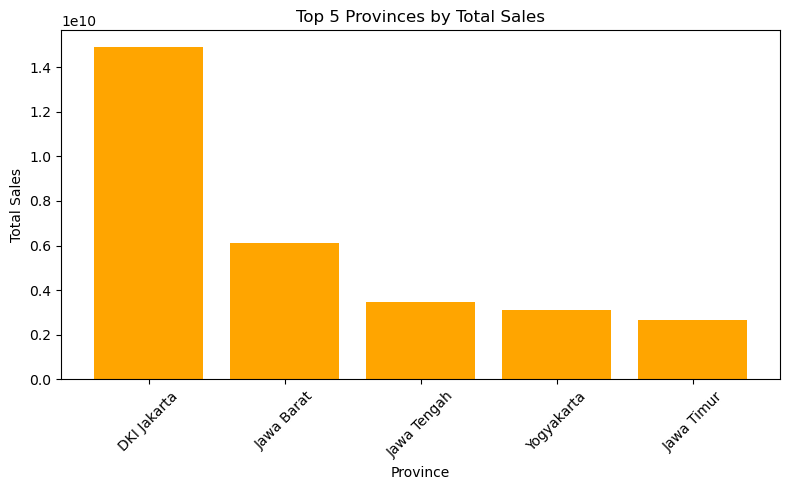

In [3]:
# ===============================
# CASE 3: Top 5 Provinces by Total Sales
# ===============================
# Objective: Show provinces with the highest total sales value
# This chart displays the top provinces that contributed the most to total revenue.

province_sales = retail.groupby('province')['sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
plt.bar(province_sales.index, province_sales.values, color='orange')
plt.title('Top 5 Provinces by Total Sales')
plt.xlabel('Province')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

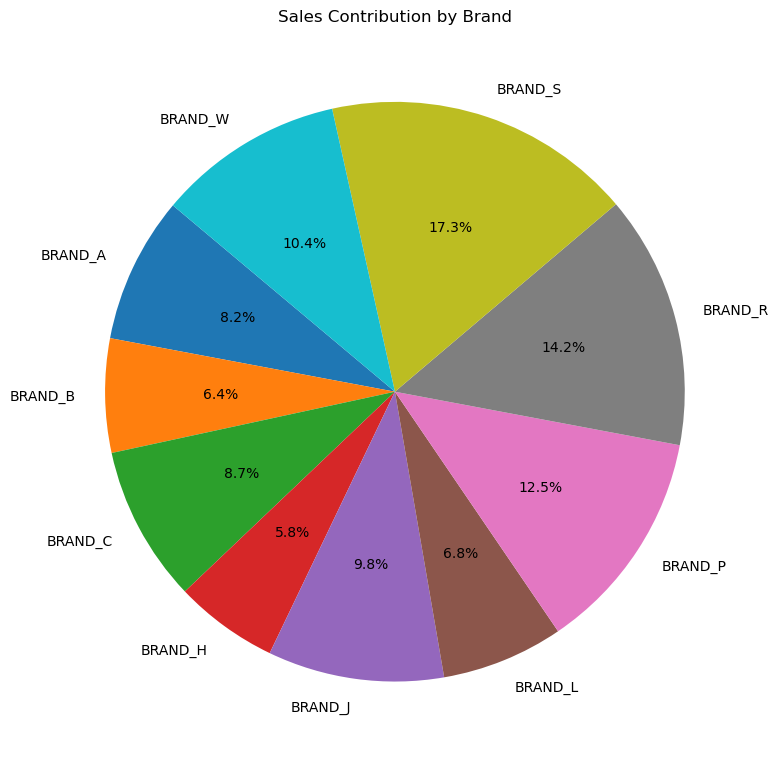

In [4]:
# ===============================
# CASE 4: Sales Contribution by Brand
# ===============================
# Objective: Show brand contributions in total sales using pie chart
# This pie chart illustrates the percentage contribution of each brand to the overall sales.

brand_sales = retail.groupby('brand')['sales'].sum()

plt.figure(figsize=(8,8))
plt.pie(brand_sales, labels=brand_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Contribution by Brand')
plt.tight_layout()
plt.show()

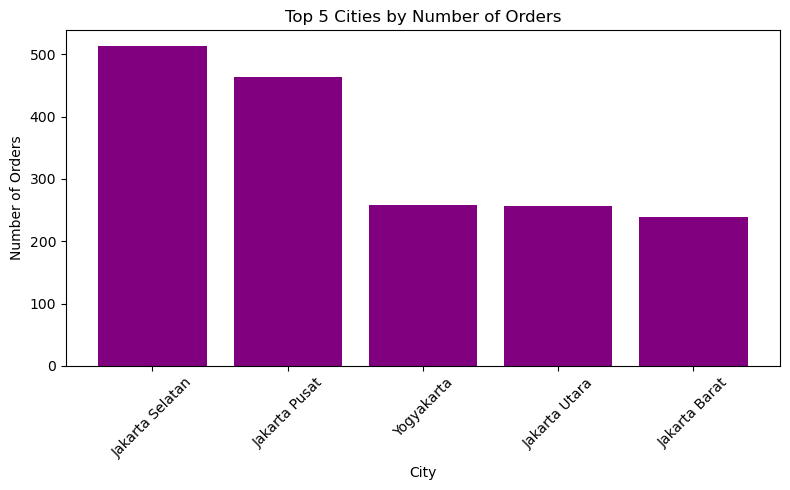

In [5]:
# ===============================
# CASE 5: Top 5 Cities by Number of Orders
# ===============================
# Objective: Visualize cities with highest number of orders
# This chart highlights cities with the most customer order activities, indicating regional demand.

city_orders = retail.groupby('city')['order_id'].nunique().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
plt.bar(city_orders.index, city_orders.values, color='purple')
plt.title('Top 5 Cities by Number of Orders')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

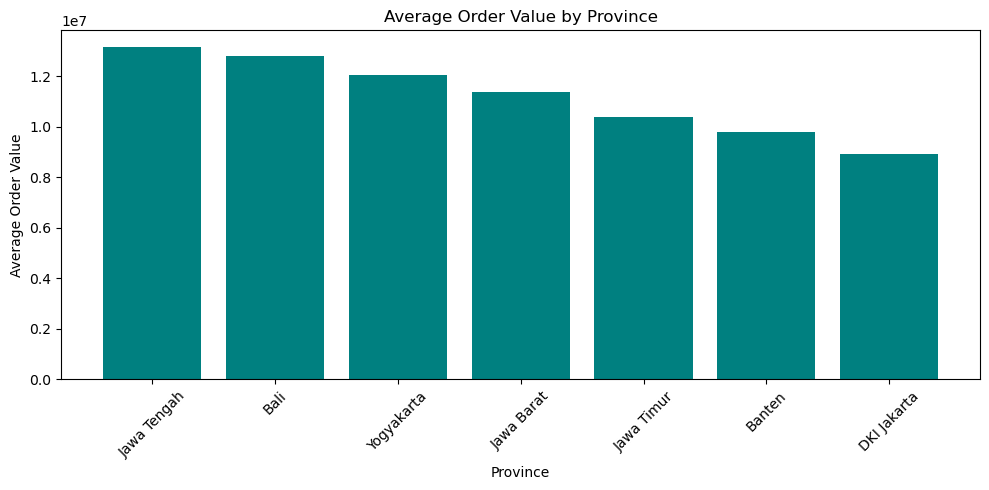

In [6]:
# ===============================
# CASE 6: Average Order Value by Province
# ===============================
# Objective: Compare average order value (AOV) across provinces
# This chart compares how much on average each order is worth across different provinces.

aov_province = retail.groupby('province')['sales'].sum() / retail.groupby('province')['order_id'].nunique()
aov_province = aov_province.sort_values(ascending=False)

plt.figure(figsize=(10,5))
plt.bar(aov_province.index, aov_province.values, color='teal')
plt.title('Average Order Value by Province')
plt.xlabel('Province')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

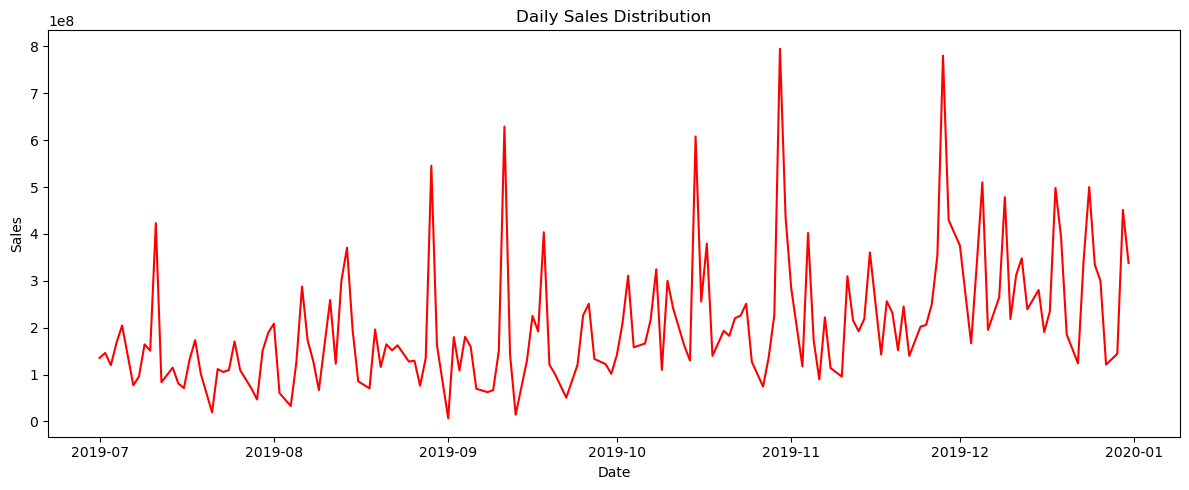

In [7]:
# ===============================
# CASE 7: Daily Sales Distribution
# ===============================
# Objective: See how sales are distributed day by day
# This line chart shows daily fluctuations in sales, which can help identify peaks or drops in performance.

daily_sales = retail.groupby('order_date')['sales'].sum()

plt.figure(figsize=(12,5))
plt.plot(daily_sales.index, daily_sales.values, color='red')
plt.title('Daily Sales Distribution')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

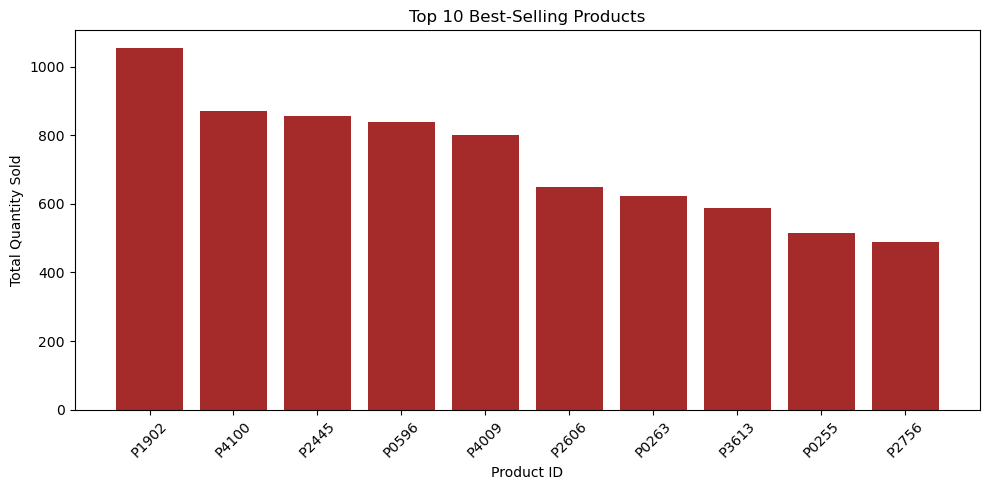

In [8]:
# ===============================
# CASE 8: Top-Selling Products
# ===============================
# Objective: Highlight the top products based on total quantity sold
# This chart identifies the 10 most purchased products based on quantity sold.

top_products = retail.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top_products.index.astype(str), top_products.values, color='brown')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
